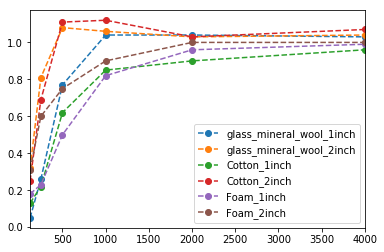

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

col = np.array([125,250,500,1000,2000,4000])
df = pd.DataFrame()
df['glass_mineral_wool_1inch'] = np.array([0.05,0.26,0.77,1.04,1.04,1.03])
df['glass_mineral_wool_2inch'] = np.array([0.32,0.81,1.08,1.06,1.03,1.04])
df['Cotton_1inch'] = np.array([0.13,0.22,0.62,0.85,0.9,0.96])
df['Cotton_2inch'] = np.array([0.25,0.69,1.11,1.12,1.03,1.07])
df['Foam_1inch'] = np.array([0.18,0.23,0.5,0.82,0.96,0.99])
df['Foam_2inch'] = np.array([0.31,0.60,0.75,0.90,1,1])

df = df.T
df.columns = col
df.T.plot(style='--o')
plt.show()

In [2]:
def func(x, a, b, c):
    return a * np.log(b * x)/(x-a) - c

def findCoef(func,x,y):
    popt, pcov = curve_fit(func, x, y)
    return popt

def findRSquared(func,x,y):
    residuals = y- func(x, *findCoef(func,x,y))
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared


In [3]:
df

,125,250,500,1000,2000,4000
glass_mineral_wool_1inch,0.05,0.26,0.77,1.04,1.04,1.03
glass_mineral_wool_2inch,0.32,0.81,1.08,1.06,1.03,1.04
Cotton_1inch,0.13,0.22,0.62,0.85,0.90,0.96
Cotton_2inch,0.25,0.69,1.11,1.12,1.03,1.07
Foam_1inch,0.18,0.23,0.50,0.82,0.96,0.99
Foam_2inch,0.31,0.60,0.75,0.90,1.00,1.00


C:\Users\virion\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


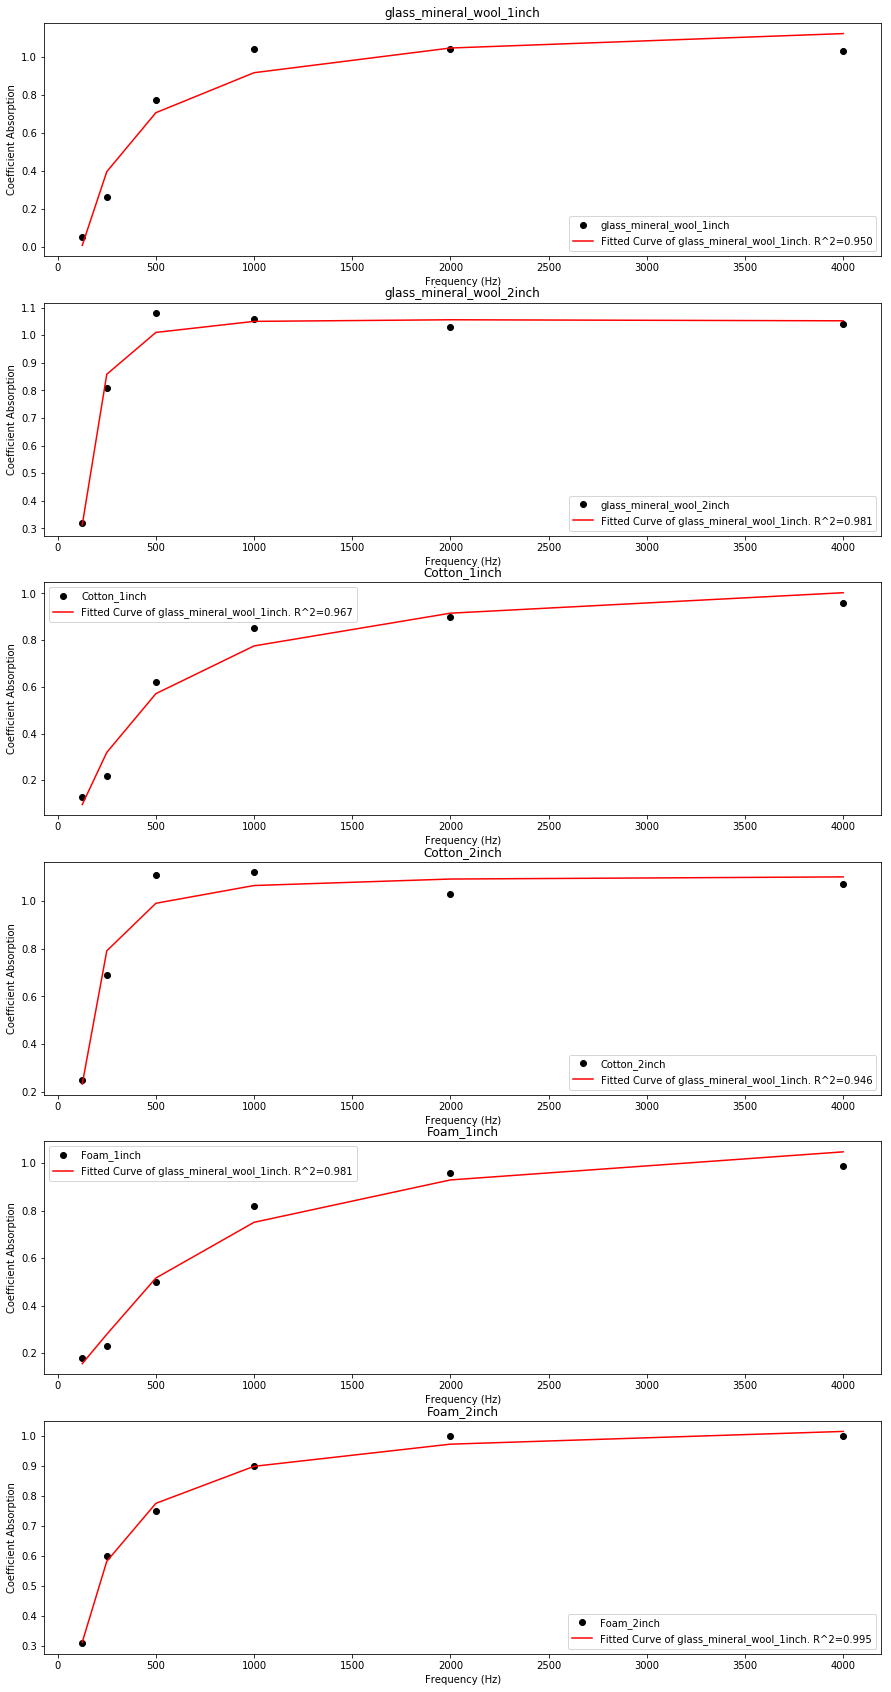

In [4]:
third_freq = np.array([125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000])
df2 = pd.DataFrame()

fig, axs = plt.subplots(6,1,figsize=(15, 30))
axs = axs.ravel()
for i in range(6):
    y = df.iloc[i,:]
    x = df.columns.values
    axs[i].plot(x, y, 'ko', label="{}".format(y.name))
    axs[i].plot(x, func(x, *findCoef(func,x,y)), 'r-', label="Fitted Curve of {}. R^2={:.3f}".format(df.iloc[0,:].name,findRSquared(func,x,y)))
    axs[i].set_title(y.name)
    axs[i].legend()
    axs[i].set_xlabel('Frequency (Hz)')
    axs[i].set_ylabel('Coefficient Absorption')
    
    df2[y.name] = func(third_freq, *findCoef(func,x,y))

plt.show()

df2 = df2.T
df2.columns = third_freq

In [5]:
df2

,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000
glass_mineral_wool_1inch,0.008011,0.150376,0.276104,0.395446,0.509816,0.616584,0.705225,0.785832,0.857776,0.915355,0.964568,1.010403,1.045064,1.074195,1.099380,1.120900
glass_mineral_wool_2inch,0.312623,0.593599,0.753277,0.858693,0.931099,0.980136,1.010107,1.030250,1.043140,1.050239,1.054108,1.055884,1.056019,1.055284,1.053976,1.052318
Cotton_1inch,0.096259,0.164728,0.238654,0.319189,0.405161,0.492833,0.570928,0.646094,0.716538,0.775238,0.827086,0.876821,0.915399,0.948503,0.977656,1.002987
Cotton_2inch,0.232269,0.502384,0.670604,0.790709,0.879938,0.945792,0.990086,1.023370,1.048027,1.064557,1.076503,1.085825,1.091693,1.095803,1.098712,1.100685
Foam_1inch,0.155831,0.178331,0.220725,0.279520,0.352653,0.435962,0.516475,0.598962,0.680349,0.751001,0.815452,0.879018,0.929473,0.973559,1.012984,1.047700
Foam_2inch,0.313442,0.417153,0.503944,0.582938,0.656020,0.722244,0.775932,0.823842,0.865938,0.899217,0.927392,0.953428,0.972995,0.989364,1.003464,1.015476
